<a href="https://colab.research.google.com/github/aarushkachhawa/Deep-Fake-Detection/blob/main/DeepFakeDetection%5BGit%5DGreyscaleDCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/data/archive.zip > /dev/null


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd real_vs_fake/real-vs-fake/



/content/real_vs_fake/real-vs-fake


In [ ]:

!ls

test  train  valid


In [ ]:
from skimage.io import imread
from skimage.color import convert_colorspace
from skimage import exposure
from skimage import feature
from skimage.color import rgb2gray
from skimage.transform import resize
import pandas as pd
import tensorflow as tf
import torch
from numba import cuda 
import time

from tensorflow import keras

device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2
import os
import tqdm

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from keras import callbacks
import keras
from keras import losses
import gc

torch.manual_seed(111)

In [ ]:
from PIL import Image

In [ ]:
def sigmoid(x):
  return np.exp(-np.logaddexp(0,-x))
from scipy import fftpack

def preProcess(img):
  gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  nd_img = np.array(gray_img,dtype = np.float64)
  processed_img = sigmoid(fftpack.dct(fftpack.dct(nd_img.T, norm = 'ortho').T, norm = 'ortho'))
  processed_img = np.expand_dims(processed_img, axis = 2)
  return processed_img

In [ ]:
def loadImages(dataPath, category, imagenum):
  flat_data_arr=[] #input array
  target_arr=[] #output array
  for i in range(len(dataPath)):
    count = 0
    for image in os.listdir(dataPath[i])[:imagenum]:
      if (not image.endswith('.jpg')):
        continue
      count = count + 1
      if count % 1000 == 0:
        print(count)
      image_array = cv2.imread(os.path.join(dataPath[i], image))
      if image_array is None:
        print(image)
      #print(image_array.shape)
      #image_resized = resize(image_array, (150,150,1))
      image_preprocess = preProcess(image_array)
      #print(image_preprocess.shape)
      flat_data_arr.append(image_preprocess)
      target_arr.append(category[i])
  x = np.array(flat_data_arr)
  y = np.array(target_arr)
  return x, y


In [ ]:
categories=[1,0]

#path which contains all the categories of images

datadirs = ['train/real/', 'train/fake'] 

x,y = loadImages(datadirs, categories, 9000)

NameError: ignored

In [ ]:
x.shape

(4000, 256, 256, 1)

In [ ]:
x = np.resize(x, (x.shape[0], 256, 256, 1))
x

array([[[[1.00000000e+000],
         [0.00000000e+000],
         [1.00000000e+000],
         ...,
         [9.60094977e-001],
         [9.99990195e-001],
         [1.18184322e-006]],

        [[1.00000000e+000],
         [1.00000000e+000],
         [0.00000000e+000],
         ...,
         [9.99146834e-001],
         [1.10961542e-001],
         [5.14374030e-001]],

        [[0.00000000e+000],
         [1.00000000e+000],
         [1.00000000e+000],
         ...,
         [9.70976525e-001],
         [6.76155100e-006],
         [9.99831316e-001]],

        ...,

        [[9.12830958e-002],
         [4.62039579e-003],
         [8.63959605e-001],
         ...,
         [8.95616581e-001],
         [9.71226930e-001],
         [4.65059073e-001]],

        [[9.99790582e-001],
         [9.97059421e-001],
         [9.98128855e-001],
         ...,
         [3.11116312e-001],
         [8.82575587e-001],
         [8.10201630e-001]],

        [[3.23324485e-002],
         [6.80521447e-005],
         [

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
#x_train

Splitted Successfully


In [ ]:
x_train

array([[[[1.00000000e+000],
         [1.00000000e+000],
         [0.00000000e+000],
         ...,
         [1.90767402e-003],
         [9.99952351e-001],
         [9.82211618e-001]],

        [[1.00000000e+000],
         [1.00000000e+000],
         [1.00000000e+000],
         ...,
         [2.84881152e-004],
         [9.89541463e-001],
         [9.96149915e-001]],

        [[1.00000000e+000],
         [9.06254290e-162],
         [1.00000000e+000],
         ...,
         [7.56333519e-001],
         [2.33590376e-001],
         [9.55508429e-001]],

        ...,

        [[9.86075883e-001],
         [3.18790480e-001],
         [9.92309426e-001],
         ...,
         [9.28242284e-001],
         [9.93636563e-001],
         [5.30209482e-002]],

        [[4.74879642e-002],
         [9.87612847e-001],
         [9.96298667e-001],
         ...,
         [6.33316471e-001],
         [9.33755701e-002],
         [9.96261438e-001]],

        [[8.84636767e-001],
         [9.97016783e-001],
         [

In [ ]:
# device = cuda.get_current_device()
# device
torch.cuda.empty_cache()
gc.collect()

152

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K


# Pamameters Initialization
inputShape = (x_train.shape[1], x_train.shape[2],x_train.shape[3])
activation = 'sigmoid' # change to relu
padding = 'same'
droprate = 0.1
epsilon=0.001
model = Sequential()
model.add(keras.Input(shape=inputShape))
model.add(BatchNormalization(input_shape=inputShape))
model.add(Conv2D(filters=6, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
          
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 6)       60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 6)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 6)      24        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      1760      
                                                        

In [ ]:
#from tensorflow.keras.optimizers import RMSprop
#opt = rmsprop(lr=0.0001, decay=1e-6)
#opt = Adam(lr=0.001, decay=1e-6)
#model.compile(loss='Loss',optimizer=keras.optimizers.SGD(0.001), metrics=['accuracy'])
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001, decay=1e-6)
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = 16, 
                    epochs = 200, 
                    verbose = 1, 
                    validation_split = 0.2, 
                    shuffle = True)

Epoch 1/100
160/160 [==============================] - 14s 23ms/step - loss: 0.6885 - accuracy: 0.5629 - val_loss: 0.6962 - val_accuracy: 0.5109
Epoch 2/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6793 - accuracy: 0.5863 - val_loss: 0.9278 - val_accuracy: 0.5109
Epoch 3/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6674 - accuracy: 0.5977 - val_loss: 0.7737 - val_accuracy: 0.5516
Epoch 4/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6573 - accuracy: 0.6199 - val_loss: 0.8487 - val_accuracy: 0.5375
Epoch 5/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6603 - accuracy: 0.6141 - val_loss: 0.7128 - val_accuracy: 0.5750
Epoch 6/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6538 - accuracy: 0.6238 - val_loss: 0.7092 - val_accuracy: 0.5437
Epoch 7/100
160/160 [==============================] - 3s 18ms/step - loss: 0.6447 - accuracy: 0.6250 - val_loss: 0.7832 - val_accuracy

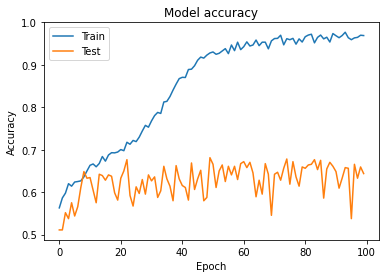

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape[0]

800

In [ ]:
y_pred = y_pred.reshape(y_pred.shape[0],)
y_pred_og = y_pred
y_pred = np.around(y_pred)

In [ ]:
def get_accuracy(y_pred, y_test):
  total_correct = 0.0
  for i in range(y_pred.shape[0]):
    if (y_pred[i] == y_test[i]):
      total_correct += 1.0
  return total_correct / y_pred.shape[0]


In [ ]:
get_accuracy(y_pred, y_test)

0.60875

In [ ]:
conf_m = tf.math.confusion_matrix(y_test,y_pred)
conf_m

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[263, 137],
       [176, 224]], dtype=int32)>

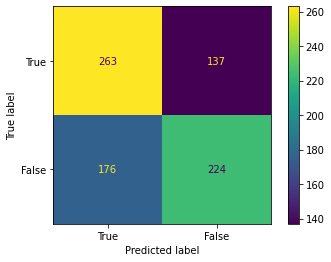

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       400
           1       0.62      0.56      0.59       400

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800



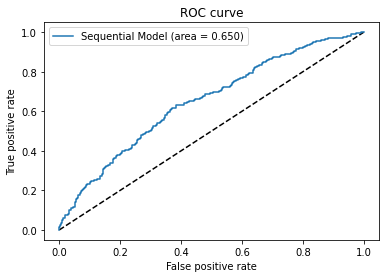

In [ ]:
print(classification_report(y_test, y_pred))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_og, pos_label=1)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Sequential Model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()